In [1]:
import torch
from torch import nn


# レイヤーを重ねてmlpを作る
# 非線形問題を解くためには活性化関数が必要になる(活性化関数を加えることでニューラルネットは非線形の関数を表現できる)
# 要するに活性化関数によって回帰問題は非線形な関数を表現できるし、分類問題は非線形な分類境界線を引ける
net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [2]:
from torch import optim
from torch.autograd import Variable as V
from sklearn.datasets import load_digits


# 手書き文字データをロード
digits = load_digits()
X = digits.data
Y = digits.target
X = torch.Tensor(X)
Y = torch.LongTensor(Y)
# 多クラス分類問題を解くので損失関数はソフトマックスクロスエントロピー
loss_fn = nn.CrossEntropyLoss()
# 最適化にはAdamを使用
optimizer = optim.Adam(net.parameters())
losses = []

In [3]:
for epoc in range(500):
    # 勾配の初期化
    optimizer.zero_grad()
    # 損失関数の計算
    y_pred = net(V(X))
    loss = loss_fn(y_pred, V(Y))
    # バックプロパゲート
    loss.backward()
    # パラメータの更新
    optimizer.step()
    losses.append(loss.data[0])

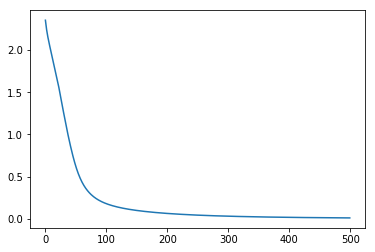

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt


plt.plot(losses)